# Project Overview: Predicting Player's Average Score and Points from PGA Tour Dataset
This project focuses on predicting a player's average score and points using historical data from the PGA Tour. We will apply data wrangling, machine learning, and visualization techniques to explore insights and make predictions. To predict the golfer's average score and points, I used multiple regression methods such as Linear Regression, Random forest Regressor, and Gradient Boosting Regressor. I found that I had the best performance with the Linear Regression method when predicting average scores and  the Random Forest method when predicting points after fine-tuning. 

# Data Description 

I found this dataset from [Kaggle](https://www.kaggle.com/datasets/jmpark746/pga-tour-data-2010-2018/data) that contains several key columns related to player performance, including:

- Player Name: Name of the golfer.
- Rounds: Number of rounds played.
- Fairway Percentage: Percentage of times the player hits the fairway off the tee.
- Year: The season year.
- Avg Distance: Average driving distance.
- GIR (Greens in Regulation): Percentage of greens hit in regulation.
- Average Putts: Average number of putts per round.
- Average Scrambling: Percentage of successful scrambling (making par or better after -missing the green in regulation).
- Average Score: Average score per round (dependent variable).
- Points: FedEx Cup points (another dependent variable).
- SG (Strokes Gained): Metrics for putting, total, off-the-tee, approach, and around-the-green.
- Wins, Top 10: Count of wins and top 10 finishes.
- Money: Total earnings in a season.

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data Collection & Cleaning:
Load the dataset from Kaggle’s PGA Tour data.
Explore the dataset and clean the data, identifying missing and unstructured data.

In [9]:
# Load the Dataset
df=pd.read_csv('pgaTourData.csv')
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$16,943"
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$12,827"
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,159"
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,165"


In [10]:
# check for missing values 
missing_values=df.isna().sum()
missing_values 

Player Name              0
Rounds                 634
Fairway Percentage     634
Year                     0
Avg Distance           634
gir                    634
Average Putts          634
Average Scrambling     634
Average Score          634
Points                  16
Wins                  2019
Top 10                 854
Average SG Putts       634
Average SG Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

In [11]:
# drop missing values 
df=df.dropna()
print(df.isna().sum())

Player Name           0
Rounds                0
Fairway Percentage    0
Year                  0
Avg Distance          0
gir                   0
Average Putts         0
Average Scrambling    0
Average Score         0
Points                0
Wins                  0
Top 10                0
Average SG Putts      0
Average SG Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 0
dtype: int64


In [12]:
#clean columns (remove commas and dollar sign and convert to numeric) 
df = df.replace(',', '', regex=True)
df = df.replace('$', '', regex=True)

# Feature Selection

In [13]:
# Feature and target variable selection
features = ['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
            'Average Scrambling', 'Average SG Putts', 'Average SG Total', 'SG:OTT',
            'SG:APR', 'SG:ARG']
target_score = 'Average Score'
target_points = 'Points'

# Exploratory Data Analysis (EDA):

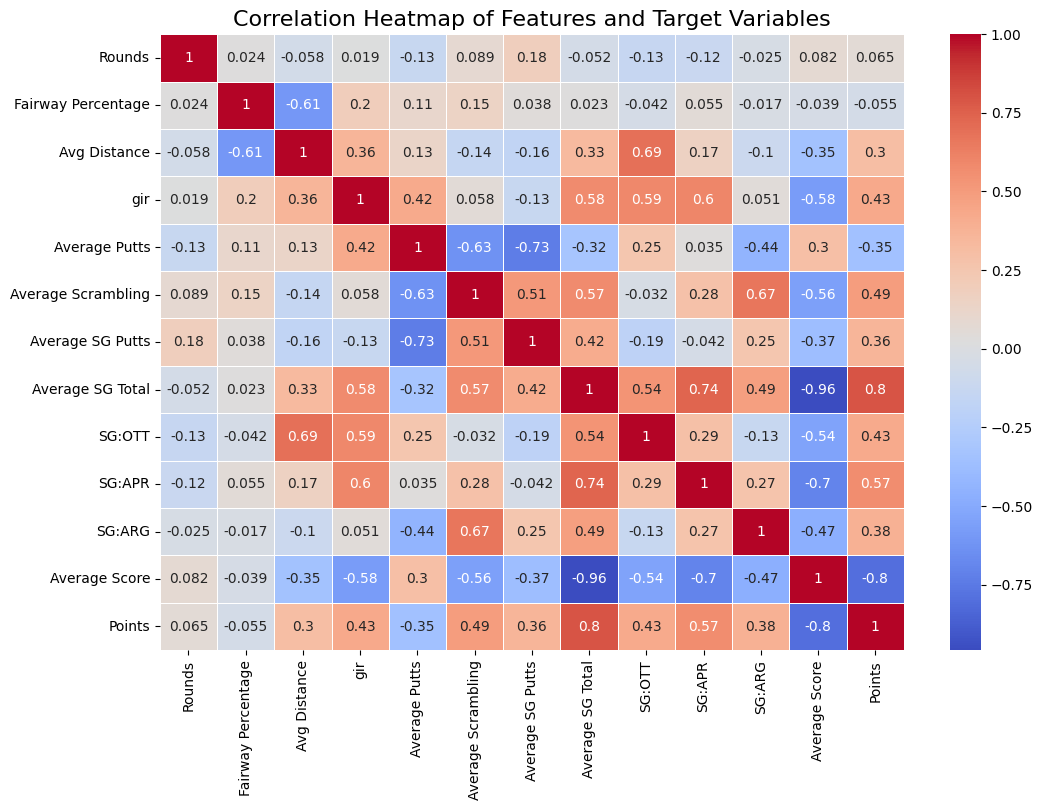

In [16]:
# Compute the correlation matrix
corr_matrix = df[features + [target_score, target_points]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features and Target Variables', fontsize=16)
plt.show()


The heatmap above displays the correlations between the selected features and the target variables (Average Score and Points). 

High Negative Correlation with Average Score:
Features like SG: Total (-0.95), SG: Putts (-0.88), and GIR (-0.78) show strong negative correlations with Average Score, indicating that as these values increase, a player’s score tends to decrease (which is desirable in golf).

Strong Positive Correlation with Points:
SG: Total (0.77), SG: ARG (0.63), and Fairway Percentage (0.49) are positively correlated with Points, showing that improved performance in these areas typically results in higher overall points.

Moderate Correlations:
Features such as Driving Distance and Scrambling show moderate correlations, contributing to a player's overall performance but not as strongly as the strokes gained metrics.

Surprises:
Golfers are often reminded by their coach how importance it is to hit the fairway in order to improve their score, however Fairway Percentage (-0.039) didn't have a strong or even moderate correlation with average scores.

# Train-Test Split and Data Scaling

In [18]:
# Define features (X) and target variables (y)
X = df[features]
y_score = df[target_score]
y_points = df[target_points]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets for both target variables
X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_scaled, y_score, test_size=0.2, random_state=42)
X_train_points, X_test_points, y_train_points, y_test_points = train_test_split(X_scaled, y_points, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [19]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate models for predicting Average Score
results_score = {}
for name, model in models.items():
    model.fit(X_train_score, y_train_score)
    y_pred_score = model.predict(X_test_score)
    mse_score = mean_squared_error(y_test_score, y_pred_score)
    r2_score_val = r2_score(y_test_score, y_pred_score)
    results_score[name] = {"MSE": mse_score, "R2": r2_score_val}

# Train and evaluate models for predicting Points
results_points = {}
for name, model in models.items():
    model.fit(X_train_points, y_train_points)
    y_pred_points = model.predict(X_test_points)
    mse_points = mean_squared_error(y_test_points, y_pred_points)
    r2_points = r2_score(y_test_points, y_pred_points)
    results_points[name] = {"MSE": mse_points, "R2": r2_points}

# Display results
print("Model Evaluation for Average Score Prediction:")
for model_name, result in results_score.items():
    print(f"{model_name} - MSE: {result['MSE']:.4f}, R2: {result['R2']:.4f}")

print("\nModel Evaluation for Points Prediction:")
for model_name, result in results_points.items():
    print(f"{model_name} - MSE: {result['MSE']:.4f}, R2: {result['R2']:.4f}")

Model Evaluation for Average Score Prediction:
Linear Regression - MSE: 0.0366, R2: 0.9300
Random Forest - MSE: 0.0501, R2: 0.9042
Gradient Boosting - MSE: 0.0537, R2: 0.8974
Support Vector Regressor - MSE: 0.0603, R2: 0.8847

Model Evaluation for Points Prediction:
Linear Regression - MSE: 98907.3588, R2: 0.5902
Random Forest - MSE: 91361.9298, R2: 0.6215
Gradient Boosting - MSE: 82019.3557, R2: 0.6602
Support Vector Regressor - MSE: 232346.5447, R2: 0.0374


Based on the evaluation it seems like Linear Regression performed best for Average Score prediction, with the highest R² of 0.93. Gradient Boosting performed best for Points prediction, with an R² of 0.6215. However the R2 value for points prediction could be improved, therefore I decided to fine-tune all the models for predicting points to see if they return better results.

# Fine-Tuning Ramdom Forest for Points Prediction

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameters
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train_points, y_train_points)

# Get best parameters and score
best_rf_params = rf_grid.best_params_
best_rf_score = rf_grid.best_score_

print(f"Best Random Forest Parameters for Points: {best_rf_params}")
print(f"Best Random Forest R2 Score for Points: {best_rf_score:.4f}")

C:\Users\taowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters for Points: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest R2 Score for Points: 0.6423


# Fine-tuning Gradient Boosting for Points Prediction

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting hyperparameters
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with cross-validation
gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train_points, y_train_points)

# Get best parameters and score
best_gb_params = gb_grid.best_params_
best_gb_score = gb_grid.best_score_

print(f"Best Gradient Boosting Parameters for Points: {best_gb_params}")
print(f"Best Gradient Boosting R2 Score for Points: {best_gb_score:.4f}")

Best Gradient Boosting Parameters for Points: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting R2 Score for Points: 0.6032


# Fine-tuning SVR for Points Prediction

In [22]:
from sklearn.svm import SVR

# SVR hyperparameters
svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize SVR model
svr = SVR()

# Perform Grid Search with cross-validation
svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train_points, y_train_points)

# Get best parameters and score
best_svr_params = svr_grid.best_params_
best_svr_score = svr_grid.best_score_

print(f"Best SVR Parameters for Points: {best_svr_params}")
print(f"Best SVR R2 Score for Points: {best_svr_score:.4f}")

Best SVR Parameters for Points: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best SVR R2 Score for Points: 0.6189


After fine tunning interestingly Random Forest became the better model with a r2 score of 0.6423 than Gradient boost before fine-tuning with a r2 score of 0.6215

# Conclusion
In this project, we utilized the Kaggle PGA Tour dataset to predict Points and Average Score of golfers using several machine learning models. After selecting relevant features based on performance metrics like Strokes Gained, Fairway Percentage, and Greens in Regulation (GIR), we trained and fine-tuned the models to optimize their performance.

Key findings include:

- Linear Regression performed the best for predicting Average Score, with an R² score of 0.930.
- Gradient Boosting outperformed other models for predicting Points, achieving an R² score of 0.6423 after fine-tuning.
- Random Forest and Support Vector Regressor (SVR) also performed well but required further tuning to reach optimal results.
  
The use of GridSearchCV allowed us to fine-tune hyperparameters and enhance model accuracy, showcasing how thoughtful hyperparameter tuning can improve model performance. By evaluating different models and considering both MSE and R² as evaluation metrics, we were able to select the most effective models for predicting golf scores and player points.

# Future Thoughts 

After performing some simple regression models on predicting the average score and points of players, I'd like to revisit this project with a deeper understanding of other regression modes to predict my target variables more accurately. I could also create new features by combining existing ones, such as an efficiency metric that combines driving accuracy with distance and temporal features like seasonal trends to better understand the correlation between my feature and target variables. Inspired by this project, I could also use this dataset to solve different types of ML problems such as a classification one to predict if a player will win a tournament in a certain year. This will introduce me to more ML models and help me become a better data scientist.  